In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [2]:
dat = pd.read_csv('intersects.bed', sep = '\t', header = None)
dat

,0,1,2,3,4,5,6,7,8
0,chr13,3148721,3188924,Speer6-ps1,0.000000,chr13,3100000,3200000,-0.004578
1,chr13,3477549,3491644,2810429I04Rik,6.992451,chr13,3400000,3500000,0.017047
2,chr13,3497296,3500000,1700024F13Rik,1.282941,chr13,3400000,3500000,0.017047
3,chr13,3537321,3565507,Gdi2,467.203283,chr13,3500000,3600000,0.028550
4,chr13,3633278,3651025,Asb13,5.976786,chr13,3600000,3700000,0.021227
5,chr13,3802139,3803564,Calml3,0.000000,chr13,3800000,3900000,0.019423
6,chr13,3837003,3837917,Calm4,0.000000,chr13,3800000,3900000,0.019423
7,chr13,3853419,3854007,Calm5,0.000000,chr13,3800000,3900000,0.019423
8,chr13,3881264,3900000,Net1,38.527865,chr13,3800000,3900000,0.019423
9,chr13,3923941,3934523,Tubal3,0.050840,chr13,3900000,4000000,0.011376


In [72]:
dat_subset = dat.iloc[:,[1, 2, 4, 8]]
dat_subset.columns = ['start','stop','FPKM', 'eigen']

In [73]:
positive = dat_subset[dat_subset['eigen'] > 0]
negative = dat_subset[dat_subset['eigen'] < 0]
plot_me_pos = np.log2(positive['FPKM']+1)
plot_me_neg = np.log2(negative['FPKM']+1)

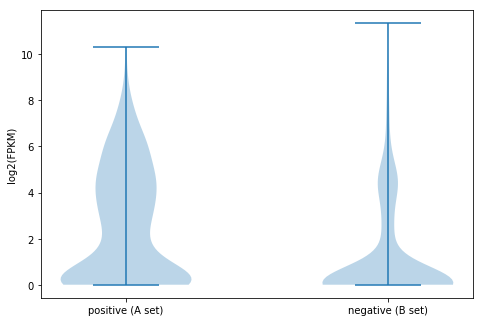

In [74]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
data = list([np.asarray(plot_me_pos), np.asarray(plot_me_neg)])
ax.violinplot(data)
label = ['positive (A set)','negative (B set)']
ax.set_xticks([1,2])
ax.set_xticklabels(label)
ax.set_ylabel('log2(FPKM)')
plt.show()

In [75]:
import pyBigWig
bw = pyBigWig.open('data/WT_H3K27me3.bw')

In [90]:
A_starts = []
A_stops = []
A_stats = []

B_starts = []
B_stops = []
B_stats = []

for i in range(820):
        begin=dat_subset['start'][i]
        end=dat_subset['stop'][i]
        stats = bw.stats('chr13', begin, end, type='sum')
        if dat_subset['eigen'][i] > 0:
            A_starts.append(begin)
            A_stops.append(end)
            A_stats.append(stats[0])
        else:
            B_starts.append(begin)
            B_stops.append(end)
            B_stats.append(stats[0])

Text(17.2,0.5,'log2(H3K27me3)')

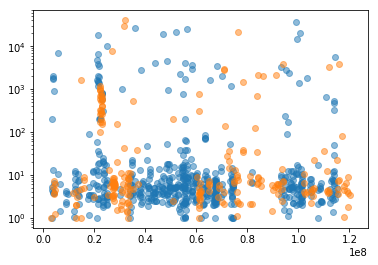

In [110]:
fig = plt.figure()
#ax = fig.add_axes([0,0,1,1]
plt.scatter(A_starts, A_stats, alpha=0.5)
plt.scatter(B_starts, B_stats, alpha=0.5)
plt.yscale('log')